In [54]:
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import numpy as np

WINDOW = 4000
OVERLAP = 1000
THRESHOLD = 800

def vad(filename):
    rate, data = wf.read(filename)
    if len(data.shape) == 2 :
        data = np.mean(data, axis=1, dtype=data.dtype)
        channels = 1
        
    data = abs(data)
    plt.figure(figsize=(12,8))
    plt.plot(np.arange(len(data)), data)
    plt.title("Raw audio signal")
    plt.show()
    start = 0
    detected = []
    
    while start < len(data) - WINDOW:
        end = min(start + WINDOW, len(data - 1))
        mean = np.sum(data[start:end]) / WINDOW
        detected.append(mean > THRESHOLD) 
        start += OVERLAP
        
    return detected
    

In [55]:
def plotVad(filename):
    detectedVoice = vad(filename);
    plt.plot(np.array(detectedVoice), label="Detected")
    plt.legend()
    plt.title(filename + ": detected vs. non-detected region")
    plt.show()

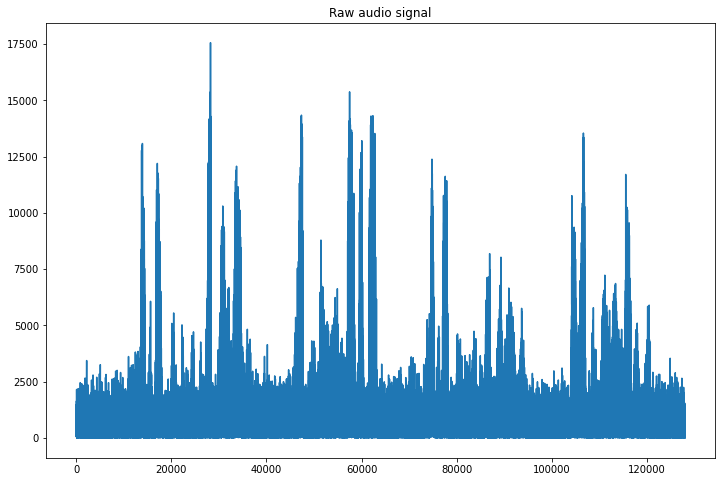

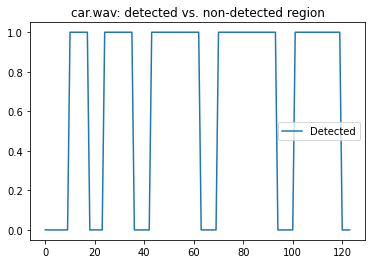

In [56]:
plotVad('car.wav')

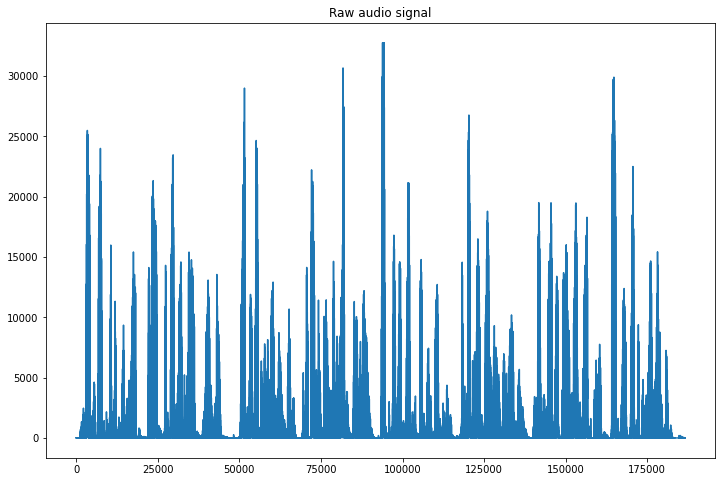

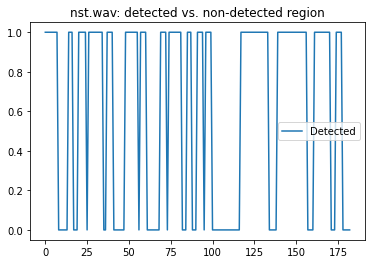

In [57]:
plotVad('nst.wav')